<a href="https://colab.research.google.com/github/Aravinnthram/CDW-Intern/blob/day3/rnns_stock_price_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Install the necessary libraries

In [ ]:
!pip install keras
!pip install tensorflow
!pip install pandas
!pip install matplotlib
!pip install sklearn

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(1)

#Load the Meta stock price data from CSV
prices = pd.read_csv('/content/FB-stock-prices.csv')

#Review loaded data
print(prices.dtypes)
prices.head()

Date     object
Price     int64
dtype: object


,Date,Price
0,1/4/2021,269
1,1/5/2021,271
2,1/6/2021,263
3,1/7/2021,269
4,1/8/2021,268


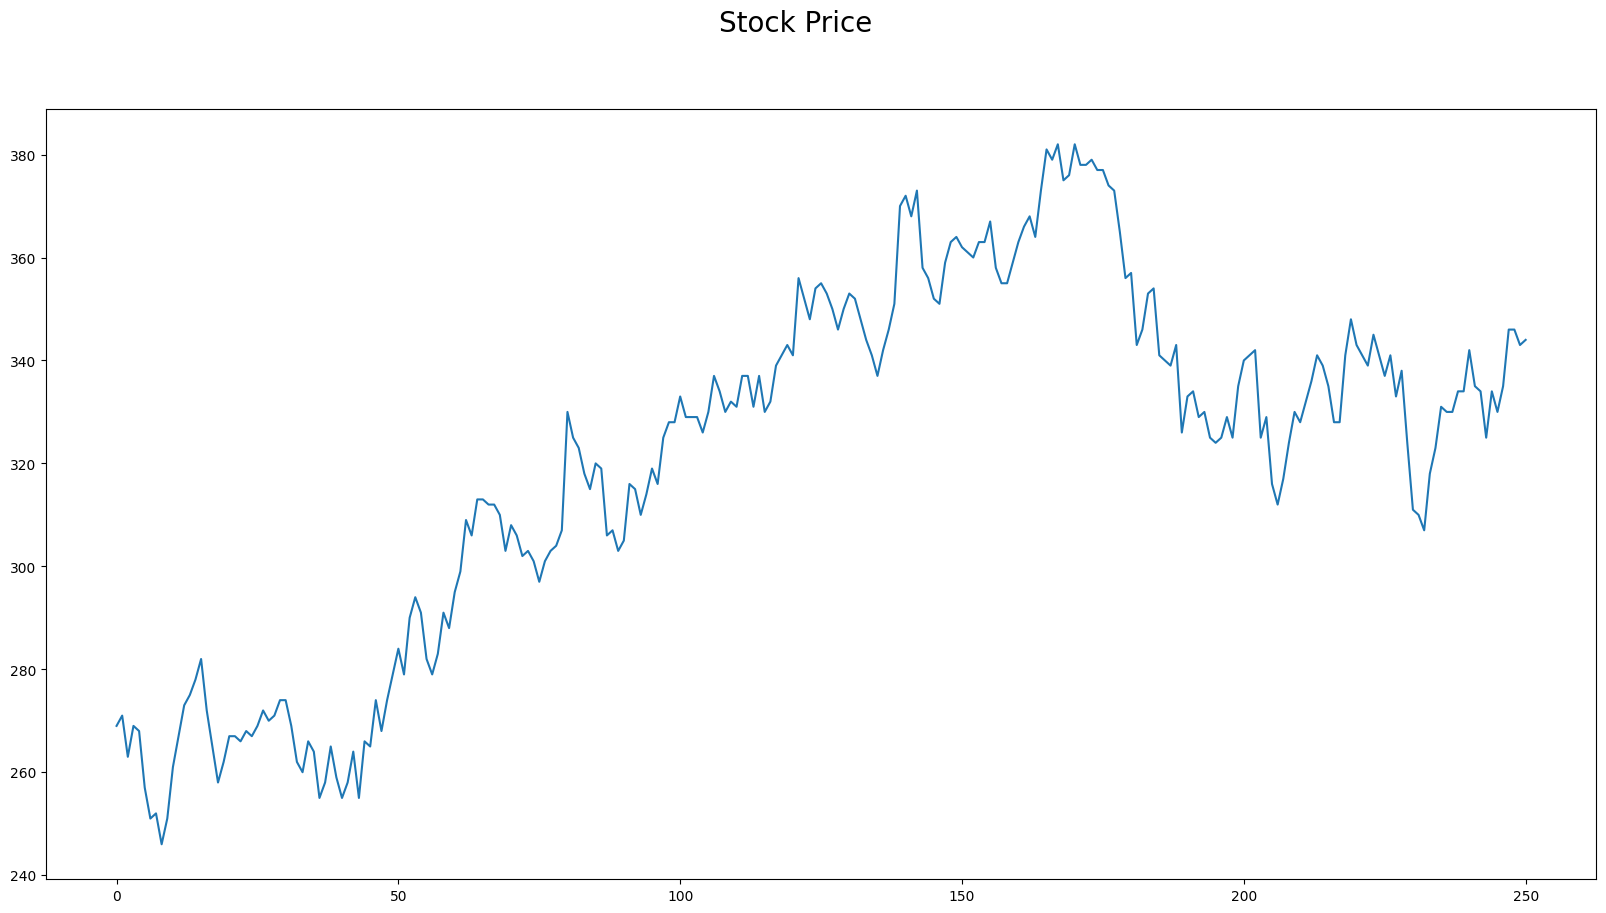

In [ ]:
plt.figure(figsize=(20,10)).suptitle("Stock Price", fontsize=20)
plt.plot(prices["Price"])
plt.show()

## Data pre-processing

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_prices=scaler.fit_transform(prices[["Price"]].values)

In [ ]:
# print(scaled_prices)

### Split data as train and test

In [ ]:
total_size = len(scaled_prices)
test_size = 50
train_size = total_size - test_size
print(train_size, test_size)

201 50


### Take the train and test dataframe

In [ ]:
training_prices = scaled_prices[0:train_size,:]
test_prices = scaled_prices[train_size:,:]

print(training_prices.shape, test_prices.shape)

(201, 1) (50, 1)


## Create RNN dataset for training based on time step

In [ ]:
def create_rnn_dataset(data, lookback=1):

    data_x, data_y = [], []
    for i in range(len(data)- lookback -1):
            a = data[i:(i+ lookback), 0]
            data_x.append(a)
            data_y.append(data[i + lookback, 0])
    return np.array(data_x), np.array(data_y)

In [ ]:
#lookback for 25 previous days
lookback=25
train_req_x, train_req_y = create_rnn_dataset(training_prices,lookback)

In [ ]:
train_req_x = np.reshape(train_req_x,
                         (train_req_x.shape[0],1, train_req_x.shape[1]))

print("Shapes of X, Y: ",train_req_x.shape, train_req_y.shape)

Shapes of X, Y:  (175, 1, 25) (175,)


## Building the RNN model

In [ ]:
from keras.models import Sequential
from keras.layers import SimpleRNN,Dense
import tensorflow as tf

tf.random.set_seed(3)

price_model=Sequential()
price_model.add(SimpleRNN(32, input_shape=(1,lookback)))
price_model.add(Dense(1))

#Compile with Adam Optimizer. Optimize for minimum mean square error
price_model.compile(loss="mean_squared_error",
                 optimizer="adam",
                 metrics=["mse"])

#Print model summary
price_model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 32)                  │           1,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,889 (7.38 KB)

 Trainable params: 1,889 (7.38 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
price_model.summary()
price_model.fit(train_req_x, train_req_y,
             epochs=5, batch_size=1, verbose=1)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 32)                  │           1,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,889 (7.38 KB)

 Trainable params: 1,889 (7.38 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
175/175 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.2087 - mse: 0.2087
Epoch 2/5
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0634 - mse: 0.0634
Epoch 3/5
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0452 - mse: 0.0452
Epoch 4/5
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0385 - mse: 0.0385
Epoch 5/5
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0347 - mse: 0.0347


## Test the model

In [ ]:
test_req_x, test_req_y = create_rnn_dataset(test_prices,lookback)
print(test_req_x.shape, test_req_y.shape)

(24, 25) (24,)


In [ ]:
test_req_x = np.reshape(test_req_x,
                         (test_req_x.shape[0],1, test_req_x.shape[1]))
price_model.evaluate(test_req_x, test_req_y, verbose=1)
predict_on_test = price_model.predict(test_req_x)
#Inverse the scaling to view results
predict_on_test = scaler.inverse_transform(predict_on_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 417ms/step - loss: 0.0696 - mse: 0.0696
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


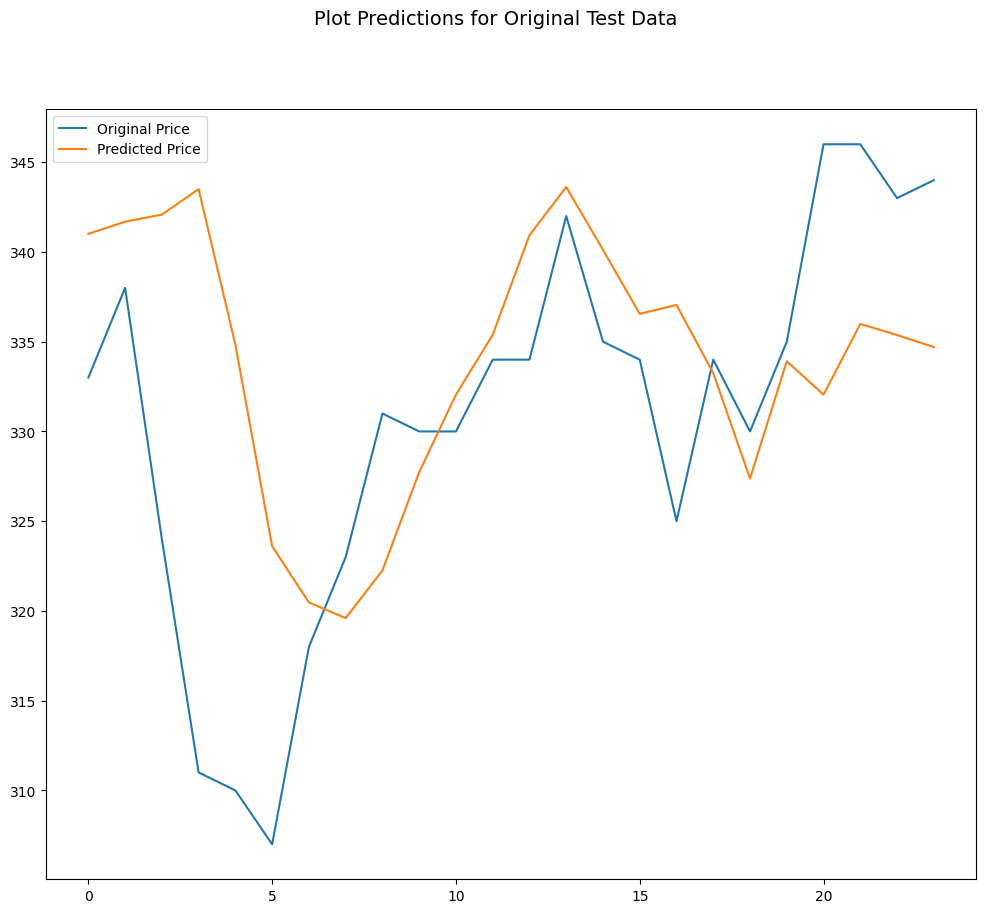

In [ ]:
#Extract original test values that map to the same dates on the predicted test values
orig_test_values = prices[["Price"]].loc[total_size-len(predict_on_test):]
orig_test_values.reset_index(drop=True, inplace=True)

plt.figure(figsize=(12,10)).suptitle("Plot Predictions for Original Test Data", fontsize=14)
plt.plot(orig_test_values, label="Original Price")
plt.plot(predict_on_test, label="Predicted Price")
plt.legend()
plt.show()

## Predictions

In [ ]:
#Previous prices
previous_prices = np.array([325,335,340,341,342,
                            325,329,316,312,317,
                            324,330,328,332,336,
                            341,339,335,328,328,
                            341,348,343,341,339])


scaled_prices = scaler.transform(previous_prices.reshape(-1, 1))
model_input = np.reshape(scaled_prices,
                         (scaled_prices.shape[1],1, scaled_prices.shape[0]))
prediction = price_model.predict(model_input)
#scale back
norm_prediction = scaler.inverse_transform(prediction)
print("Predicted stock price is :", norm_prediction[0][0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Predicted stock price is : 331.27457
